In [1]:
library(Seurat)
library(plyr)
library(dplyr)
library(Matrix)
library(ggplot2)
library(reshape2)
library(stringr)
library(edgeR)
library(ggsci)
library(cowplot)
library(RColorBrewer)
library(colorspace)
library(ggthemes)
library(scales)
library(ggrepel)
library(stats)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: limma


Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map




In [2]:
setwd('/home/jovyan/data/GCA/stats')
initial_stats<-read.csv('initial_clustering_stats.csv', row.names = 1)

In [15]:
initial_stats <- initial_stats %>% filter(!anno == '')
initial_stats <- initial_stats %>% filter(!anno == 'Doublet_tissue')
initial_stats <- initial_stats %>% filter(!anno == 'Epithelium_tissue')
initial_stats <- initial_stats %>% filter(!anno == 'Muscle_tissue')
initial_stats <- initial_stats %>% filter(!anno == 'Melanocyte_tissue')

In [16]:
setwd('/home/jovyan/data/GCA/stats')
colours<-read.csv('colours.csv', row.names = 1, header = TRUE)

In [17]:
initial_stats_tissue <- initial_stats %>% filter(tissue =='tissue')
initial_stats_blood <- initial_stats %>% filter(tissue =='blood')


In [18]:
initial_stats_blood<-initial_stats_blood %>% group_by(patient_id) %>% mutate(total_patient=n())
initial_stats_blood<-initial_stats_blood %>% group_by(patient_id, anno) %>% mutate(total_patient_cell=n())
initial_stats_blood<-initial_stats_blood %>% unique()

initial_stats_blood<-initial_stats_blood %>% mutate(props = total_patient_cell/total_patient)

initial_stats_blood<-initial_stats_blood %>% group_by(diagnosis, anno) %>% summarise(average_in_cluster = mean(props))

`summarise()` has grouped output by 'diagnosis'. You can override using the `.groups` argument.



In [19]:
initial_stats_tissue<-initial_stats_tissue %>% group_by(patient_id) %>% mutate(total_patient=n())
initial_stats_tissue<-initial_stats_tissue %>% group_by(patient_id, anno) %>% mutate(total_patient_cell=n())
initial_stats_tissue<-initial_stats_tissue %>% unique()

initial_stats_tissue<-initial_stats_tissue %>% mutate(props = total_patient_cell/total_patient)

initial_stats_tissue<-initial_stats_tissue %>% group_by(diagnosis, anno) %>% summarise(average_in_cluster = mean(props))

`summarise()` has grouped output by 'diagnosis'. You can override using the `.groups` argument.



In [20]:
setdiff(unique(initial_stats_tissue$anno), c('CD4_1_tissue',
                                                                                'CD4_2_tissue',
                                                                                'Treg_tissue',
                                                                                
                                                                                'CD8_tissue',

                                                                                'Plasma_tissue',
                                                                                
                                                                                'Mac1_tissue',
                                                                                'Mac2_tissue',
                                                                                'Mac3_tissue',
                                                                                'DC_tissue',
                                                                                'Epi_tissue',
                                                                                'Endothelium_tissue',
                                                                                
                                                                                
                                                                                'VSMC_tissue',
                                                                                'Transitional_tissue',
                                                                                'MyoFB_tissue'))

[1] "CD4_exhausted_tissue" "Endothelium_1_tissue" "Endothelium_2_tissue"
[4] "Lymph_endo_tissue"    "NK_tissue"

In [26]:
initial_stats_blood$anno<-factor(initial_stats_blood$anno, levels = colours$anno)
initial_stats_tissue$anno<-factor(initial_stats_tissue$anno, levels = colours$anno)

In [9]:
initial_stats_blood$anno<-factor(initial_stats_blood$anno, levels = c('CD4_naive_CM_blood',
                                                                                'CD4_EM_blood', 
                                                                      'CD4_overlap_blood',
                                                                      'CD4_cytotoxic_blood',
                                                                      
                                                                               
                                                                                'Treg_blood',
                                                                                
                                                                                'CD8_naive_blood',
                                                                                'CD8_Eff_blood',
                                                                                'NK_56hi_blood',
                                                                                'NK_56lo_blood',

                                                                                'B_cell_imm_blood',
                                                                                'B_cell_mat_blood',
                                                                                'Plasma_blood',

                                                                                'CD14_blood',
                                                                                
                                                                                'cDC1_blood',
                                                                      'cDC2_blood'
                                                                                'HSC_blood',

                                                                                
                                                                                'Platelets_blood',
                                                                                'RBC_blood',
                                                                     'Epi_blood'))

In [10]:
initial_stats_tissue$anno<-factor(initial_stats_tissue$anno, levels = c('CD4_1_tissue',
                                                                                'CD4_2_tissue',
                                                                                'CD4_exhausted_tissue',
                                                                                
                                                                                'CD8_tissue',
                                                                        'NK_tissue',

                                                                                'Plasma_tissue',
                                                                                
                                                                                'Mac1_tissue',
                                                                                'Mac2_tissue',

                                                                                'DC_tissue',
                                                                                
                                                                                'Endothelium_1_tissue',
                                                                                'Endothelium_2_tissue',
                                                                                'Lymph_endo_tissue',
                                                                                
                                                                                'VSMC_tissue',
                                                                                'Transitional_tissue',
                                                                                'MyoFB_tissue'))

In [27]:
blood_colours<-colours %>% filter(anno %in% initial_stats_blood$anno)
tissue_colours<-colours %>% filter(anno %in% initial_stats_tissue$anno)

Saving 6.67 x 6.67 in image



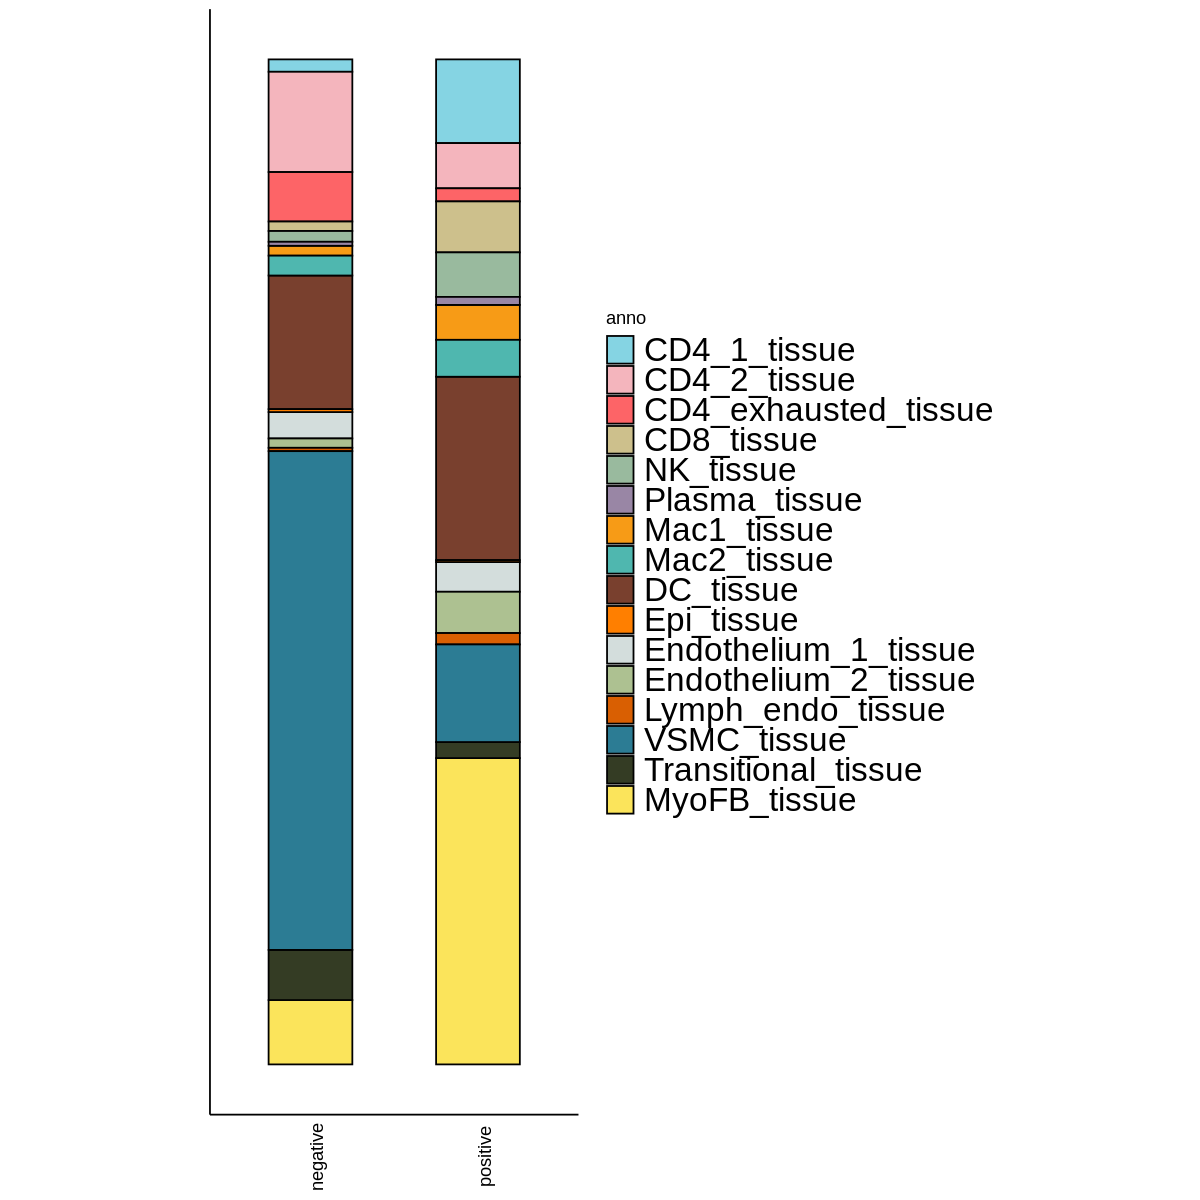

In [28]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(data=initial_stats_tissue, aes(x=diagnosis, y=average_in_cluster, fill=anno)) +
    geom_bar(stat="identity", position="fill",color="black", width = 0.5) + 
  theme(axis.line =element_blank(), axis.title.x=element_blank(), axis.title.y=element_blank(),  axis.text = element_blank(), axis.ticks = element_blank(),strip.text.x = element_text(size = 12)) +
scale_fill_manual(values = tissue_colours$colors)+
      theme(aspect.ratio = 3/1) +
theme(axis.text.x = element_text(angle = 90)) +
theme(axis.title.x=element_blank(),
  #      axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
      axis.title.y=element_blank(),
      axis.text.y=element_blank()) +
theme(legend.text=element_text(size=20)) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black")) 

setwd('/home/jovyan/data/GCA/figures')

ggsave("tissue_proportions_barplot.png",  width = NA,  height = NA,  units = c("in", "cm", "mm"),  dpi = 300)

Saving 6.67 x 6.67 in image



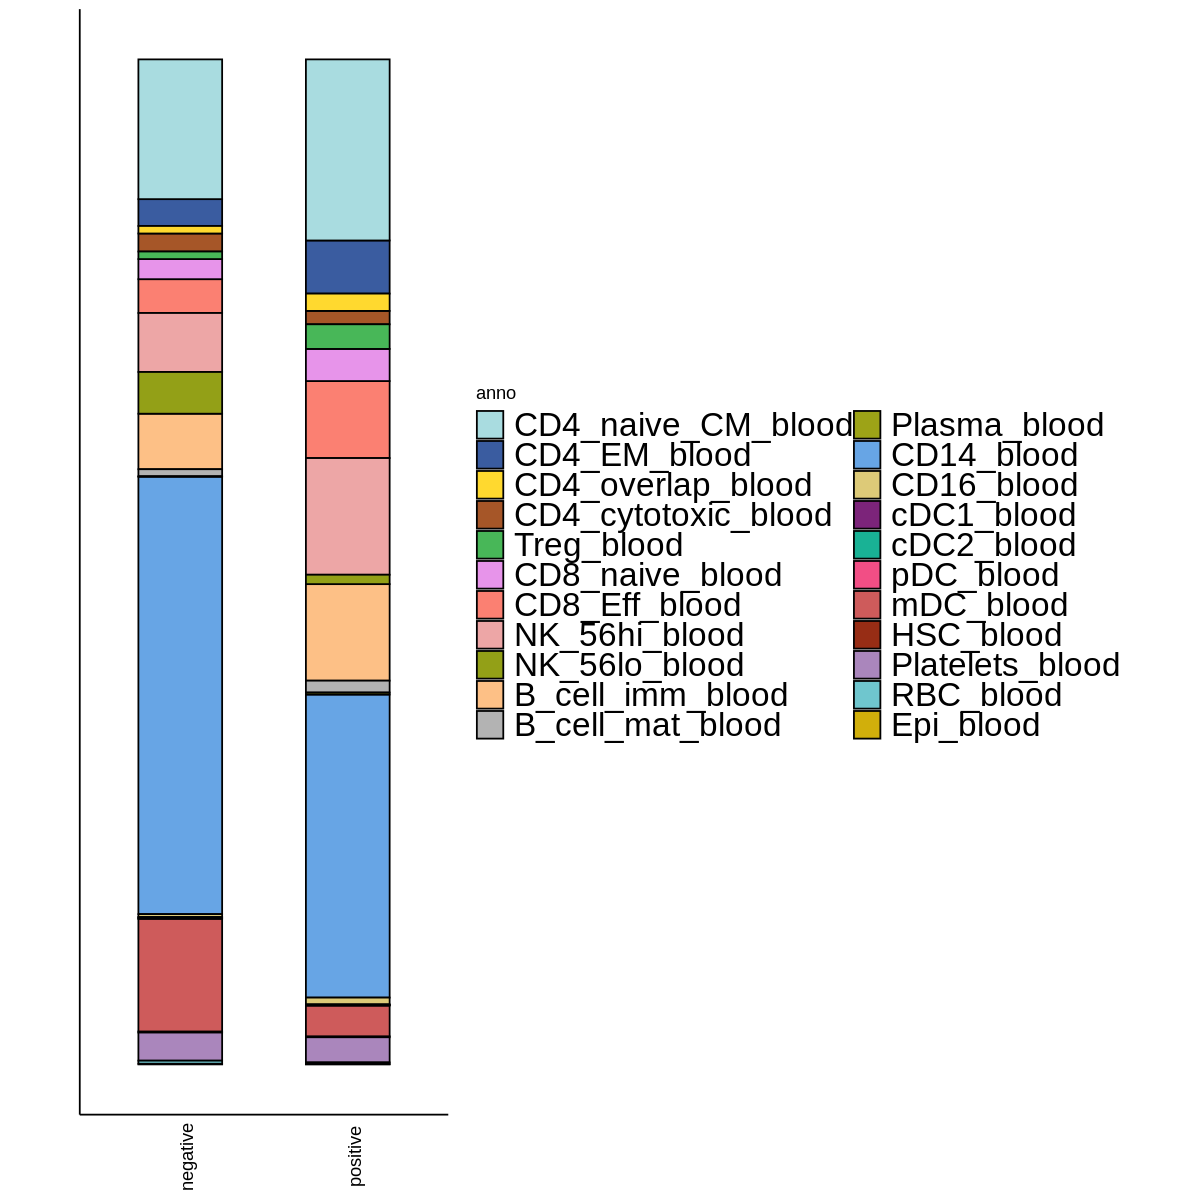

In [29]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(data=initial_stats_blood, aes(x=diagnosis, y=average_in_cluster, fill=anno)) +
    geom_bar(stat="identity", position="fill",color="black", width = 0.5) + 
  theme(axis.line =element_blank(), axis.title.x=element_blank(), axis.title.y=element_blank(),  axis.text = element_blank(), axis.ticks = element_blank(),strip.text.x = element_text(size = 12)) +
scale_fill_manual(values = blood_colours$colors)+
      theme(aspect.ratio = 3/1) + 
  theme(axis.text.x = element_text(angle = 90)) +
theme(axis.title.x=element_blank(),
  #      axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
      axis.title.y=element_blank(),
      axis.text.y=element_blank()) +
theme(legend.text=element_text(size=20)) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))

setwd('/home/jovyan/data/GCA/figures')

ggsave("blood_proportions_barplot.png",  width = NA,  height = NA,  units = c("in", "cm", "mm"),  dpi = 300)



***Clinical metadata***



In [89]:
setwd('/home/jovyan/data/GCA/datasets')
clinical_stats<-read.csv('PoV_patients.csv', row.names = 1)

Saving 6.67 x 6.67 in image



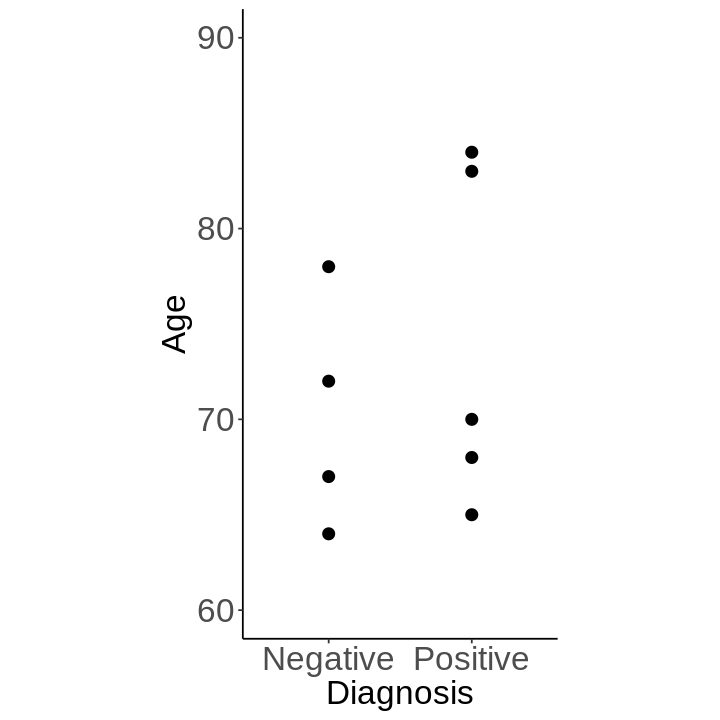

In [90]:
options(repr.plot.width=6, repr.plot.height=6)

ggplot(clinical_stats, aes(x = Diagnosis, y = Age))+
geom_point(size = 3)+ 
ylim(60,90)+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
theme(axis.text = element_text(size = 20),
     axis.title = element_text(size = 20),
     aspect.ratio = 2/1)

setwd('/home/jovyan/data/GCA/figures')

ggsave("clinical_data_age.png",
  width = NA,
  height = NA,
  units = c("in", "cm", "mm"),
  dpi = 300)

Saving 6.67 x 6.67 in image



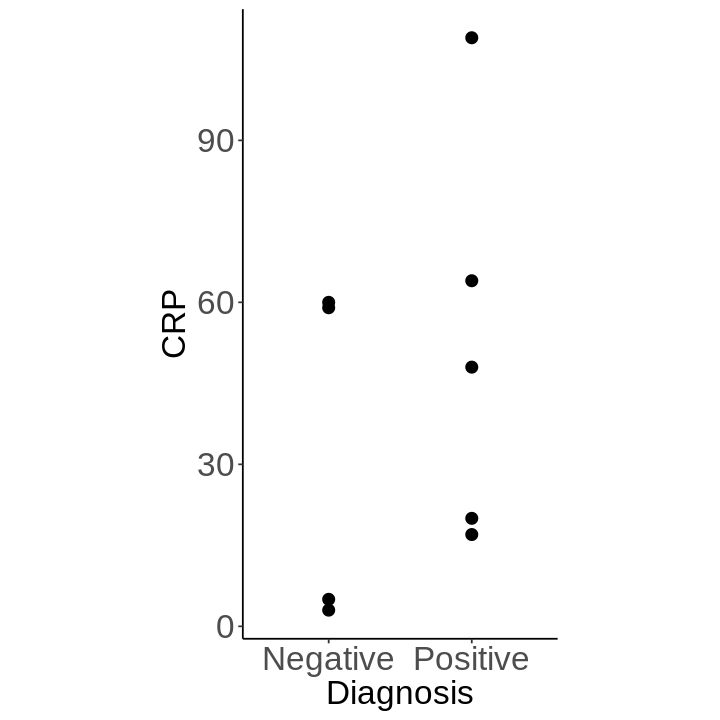

In [53]:
ggplot(clinical_stats, aes(x = Diagnosis, y = CRP))+
geom_point(size = 3)+ 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
theme(axis.text = element_text(size = 20),
     axis.title = element_text(size = 20),
     aspect.ratio = 2/1)

setwd('/home/jovyan/data/GCA/figures')

ggsave("clinical_data_CRP.png",
  width = NA,
  height = NA,
  units = c("in", "cm", "mm"),
  dpi = 300)

Saving 6.67 x 6.67 in image



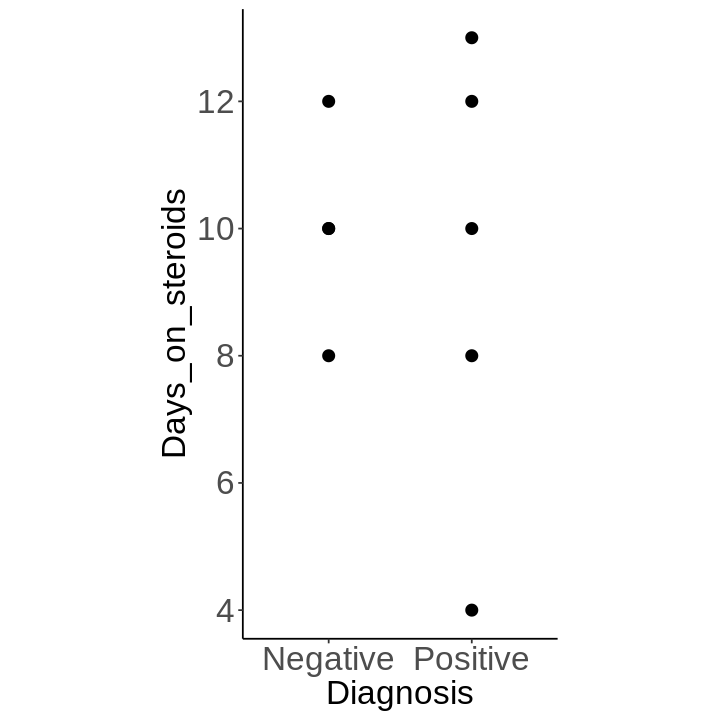

In [60]:
ggplot(clinical_stats, aes(x = Diagnosis, y = Days_on_steroids))+
geom_point(size = 3)+

theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
theme(axis.text = element_text(size = 20),
     axis.title = element_text(size = 20),
     aspect.ratio = 2/1)

setwd('/home/jovyan/data/GCA/figures')

ggsave("clinical_data_steroids.png",
  width = NA,
  height = NA,
  units = c("in", "cm", "mm"),
  dpi = 300)



***Stats***



In [30]:
setwd('/home/jovyan/data/GCA/stats')
initial_stats<-read.csv('initial_clustering_stats.csv', row.names = 1)
#tissue_stats<-initial_stats %>% filter(initial_clustering %in% c('Myofibroblasts', 'Transitional', 'VSMC'))
initial_stats <- initial_stats %>% filter(!anno == '')
initial_stats <- initial_stats %>% filter(!anno == 'Doublet_tissue')
initial_stats <- initial_stats %>% filter(!anno == 'Epithelium_tissue')
initial_stats <- initial_stats %>% filter(tissue =='tissue')
initial_stats <- initial_stats %>% filter(!anno == 'Muscle_tissue')
initial_stats <- initial_stats %>% filter(!anno == 'Melanocyte_tissue')

initial_stats$anno[initial_stats$anno == 'FB_tissue']<-'GCA_FB_tissue'

In [31]:
initial_stats$diagnosis <- factor(initial_stats$diagnosis, levels = c("positive", "negative"))

In [32]:
tissue_stats<- initial_stats %>% select(anno, patient_id, diagnosis)

In [33]:
tissue_stats$tissue_clustering<-tissue_stats$anno

In [34]:
meta<-tissue_stats%>% distinct(patient_id, diagnosis)

In [35]:
y<-data.frame(table(tissue_stats$tissue_clustering, tissue_stats$patient_id))

In [36]:
y<-dcast(y, Var1 ~ Var2, value.var = "Freq")
rownames(y)<-y$Var1
y$Var1<-NULL

In [37]:
design <- model.matrix(~ diagnosis, meta)

In [38]:
y<-y[, meta$patient_id]
s <- DGEList(y, lib.size=log(colSums(y)))
s <- estimateDisp(s, design=design)
full_linear_fit <- glmQLFit(s, design, robust=TRUE)
full_res <- as.data.frame(topTags(glmQLFTest(full_linear_fit, coef=2), sort.by='none', n=Inf))



In [39]:
full_res$CellType <- rownames(full_res)
full_res$Sig <- as.numeric(full_res$FDR < 0.1)
full_res$Diff <- sign(full_res$logFC)
full_res$Diff[full_res$FDR > 0.1] <- 0
table(full_res$Diff)


 0  1 
15  1 

Warning message:
“Ignoring unknown parameters: fill”


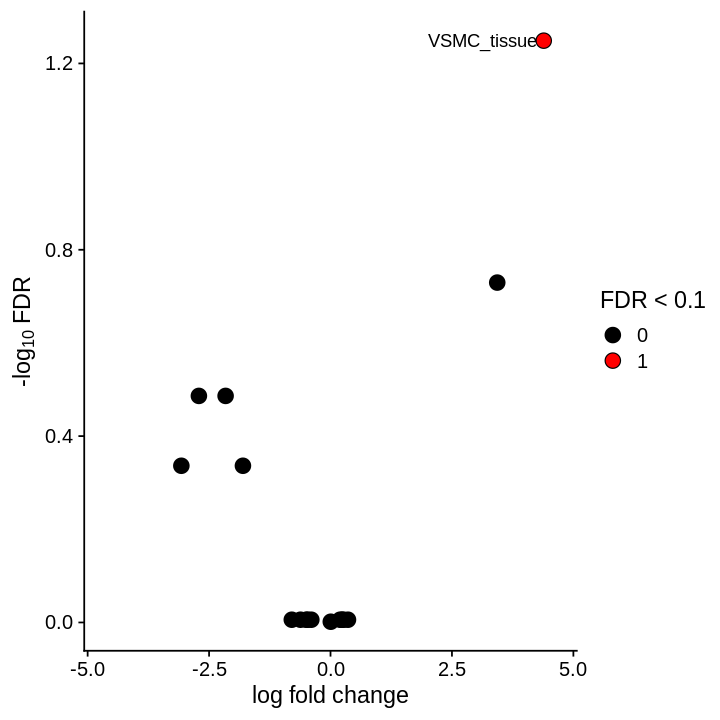

In [40]:
options(repr.plot.width=6, repr.plot.height=6)

mx.lfc <- max(abs(full_res$logFC))
eps <- mx.lfc * 0.05
infect.resplot.labels <- full_res$CellType
infect.resplot.labels[full_res$Sig == 0] <- ""
ggplot(full_res, aes(x=logFC, y=-log10(FDR), fill=as.character(Sig))) +
    geom_point(shape=21, size=4) +
    theme_cowplot() +
    scale_fill_manual(values=c("black", "red")) +
    scale_x_continuous(limits=c(-mx.lfc - eps, mx.lfc + eps), oob=squish) +
    guides(fill=guide_legend(title="FDR < 0.1")) +
    geom_text_repel(aes(label=infect.resplot.labels),
                     fill='white') +
    labs(x="log fold change", y=expression(paste("-log"[10], " FDR")))


**Neg binomial regression**


In [44]:
#Tissue analysis

setwd('/home/jovyan/data/GCA/stats')
initial_stats<-read.csv('initial_clustering_stats.csv', row.names = 1)
#tissue_stats<-initial_stats %>% filter(initial_clustering %in% c('Myofibroblasts', 'Transitional', 'VSMC'))
initial_stats <- initial_stats %>% filter(!anno == '')
initial_stats <- initial_stats %>% filter(!anno == 'Doublet_tissue')
initial_stats <- initial_stats %>% filter(!anno == 'Epithelium_tissue')

initial_stats <- initial_stats %>% filter(tissue =='tissue')
initial_stats <- initial_stats %>% filter(!anno == 'Muscle_tissue')
initial_stats <- initial_stats %>% filter(!anno == 'Melanocyte_tissue')

#initial_stats$anno[initial_stats$anno == 'FB_tissue']<-'GCA_FB_tissue'

initial_stats<-initial_stats %>% count(anno, patient_id, diagnosis, tissue)

initial_stats<-initial_stats %>% group_by(patient_id) %>% mutate(sum(n))

In [47]:
summary_results = list()
celltype<-unique(initial_stats$anno)

for(i in 1:length(celltype)) {
    temp<-initial_stats %>% filter(anno == celltype[i])
    nb_temp <- MASS::glm.nb(formula = n ~ diagnosis + offset(log(as.numeric(temp$`sum(n)`))), data = temp, maxit = 1000)
    df_temp<-data.frame(celltype[i], anova(nb_temp, test = "LRT")$`Pr(>Chi)`[2])
    colnames(df_temp)<-c('anno', 'p_value')
    summary_results[[i]]<-df_temp
}

big_data = do.call(rbind, summary_results)

[1] "CD4_1_tissue"         "CD4_2_tissue"         "CD4_exhausted_tissue"
 [4] "CD8_tissue"           "DC_tissue"            "Endothelium_1_tissue"
 [7] "Endothelium_2_tissue" "Epi_tissue"           "Lymph_endo_tissue"   
[10] "Mac1_tissue"          "Mac2_tissue"          "MyoFB_tissue"        
[13] "NK_tissue"            "Plasma_tissue"        "Transitional_tissue" 
[16] "VSMC_tissue"

In [ ]:
big_data$p_val_adj<-p.adjust(big_data$p_value, method = 'BH', n = dim(big_data)[1])

In [43]:
options(scipen = 999)
big_data
options(scipen = 0)

ERROR: Error in eval(expr, envir, enclos): object 'big_data' not found


In [193]:
#blood analysis


setwd('/home/jovyan/data/GCA/stats')
initial_stats<-read.csv('initial_clustering_stats.csv', row.names = 1)
initial_stats <- initial_stats %>% filter(!anno == '')

initial_stats <- initial_stats %>% filter(tissue =='blood')
initial_stats <- initial_stats %>% filter(!anno =='Epi_blood')
initial_stats <- initial_stats %>% filter(!anno =='RBC_blood')
initial_stats <- initial_stats %>% filter(!anno =='CD4_overlap_blood')


In [194]:
initial_stats<-initial_stats %>% count(anno, patient_id, diagnosis, tissue)

In [195]:
initial_stats<-initial_stats %>% group_by(patient_id) %>% mutate(sum(n))

In [196]:
summary_results = list()
celltype<-unique(initial_stats$anno)

for(i in 1:length(celltype)) {
    temp<-initial_stats %>% filter(anno == celltype[i])
    nb_temp <- MASS::glm.nb(formula = n ~ diagnosis + offset(log(as.numeric(temp$`sum(n)`))), data = temp, maxit = 1000)
    df_temp<-data.frame(celltype[i], anova(nb_temp, test = "LRT")$`Pr(>Chi)`[2])
    colnames(df_temp)<-c('anno', 'p_value')
    summary_results[[i]]<-df_temp
}

big_data = do.call(rbind, summary_results)

Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning me

In [197]:
big_data$p_val_adj<-p.adjust(big_data$p_value, method = 'BH', n = dim(big_data)[1])



***Covid comparison***



In [180]:
setwd('/home/jovyan/data/GCA/stats')
initial_stats<-read.csv('initial_clustering_stats.csv', row.names = 1)

In [2]:
setwd('/home/jovyan/data/GCA/stats')
covid_stats<-read.csv('covid_stats.csv', row.names = 1)

In [4]:
unique(covid_stats$patient_id)

[1] "newcastle65" "MH8919226"   "MH8919333"   "MH8919332"   "MH8919227"  
 [6] "MH8919283"   "MH8919178"   "MH8919177"   "MH8919176"   "MH8919179"  
[11] "newcastle74" "MH8919282"

In [182]:
initial_stats_tissue <- initial_stats %>% filter(tissue =='tissue')
initial_stats_blood <- initial_stats %>% filter(tissue =='blood')


In [183]:
covid_stats$anno<-paste0(covid_stats$anno, '_blood')

In [184]:
initial_stats_blood<-initial_stats_blood %>% filter(anno %in% c('CD14_blood', 'CD16_blood', 
                                                                'cDC1_blood', 'cDC2_blood', 'mDC_blood',
                                                               'pDC_blood'))

In [185]:
covid_stats<-covid_stats %>% filter(anno %in% c('CD14_blood', 'CD16_blood', 
                                                                'cDC1_blood', 'cDC2_blood', 'mDC_blood',
                                                               'pDC_blood'))

In [186]:
initial_stats_blood<-initial_stats_blood %>% group_by(patient_id) %>% mutate(total_patient=n())
initial_stats_blood<-initial_stats_blood %>% group_by(patient_id, anno) %>% mutate(total_patient_cell=n())
initial_stats_blood<-initial_stats_blood %>% unique()

initial_stats_blood<-initial_stats_blood %>% mutate(props = total_patient_cell/total_patient)

initial_stats_blood<-initial_stats_blood %>% group_by(diagnosis, anno) %>% summarise(average_in_cluster = mean(props))

`summarise()` has grouped output by 'diagnosis'. You can override using the `.groups` argument.



In [187]:
covid_stats<-covid_stats %>% group_by(patient_id) %>% mutate(total_patient=n())
covid_stats<-covid_stats %>% group_by(patient_id, anno) %>% mutate(total_patient_cell=n())
covid_stats<-covid_stats %>% unique()

covid_stats<-covid_stats %>% mutate(props = total_patient_cell/total_patient)

covid_stats<-covid_stats %>% group_by(diagnosis, anno) %>% summarise(average_in_cluster = mean(props))

`summarise()` has grouped output by 'diagnosis'. You can override using the `.groups` argument.



In [188]:
total<-rbind(covid_stats, initial_stats_blood)

In [189]:

tissue_colours<-colours %>% filter(anno %in% c('CD14_blood', 'CD16_blood', 
                                                                'cDC1_blood', 'cDC2_blood', 'mDC_blood',
                                                               'pDC_blood'))


In [190]:
total$anno<-factor(total$anno, levels = tissue_colours$anno)

Saving 6.67 x 6.67 in image



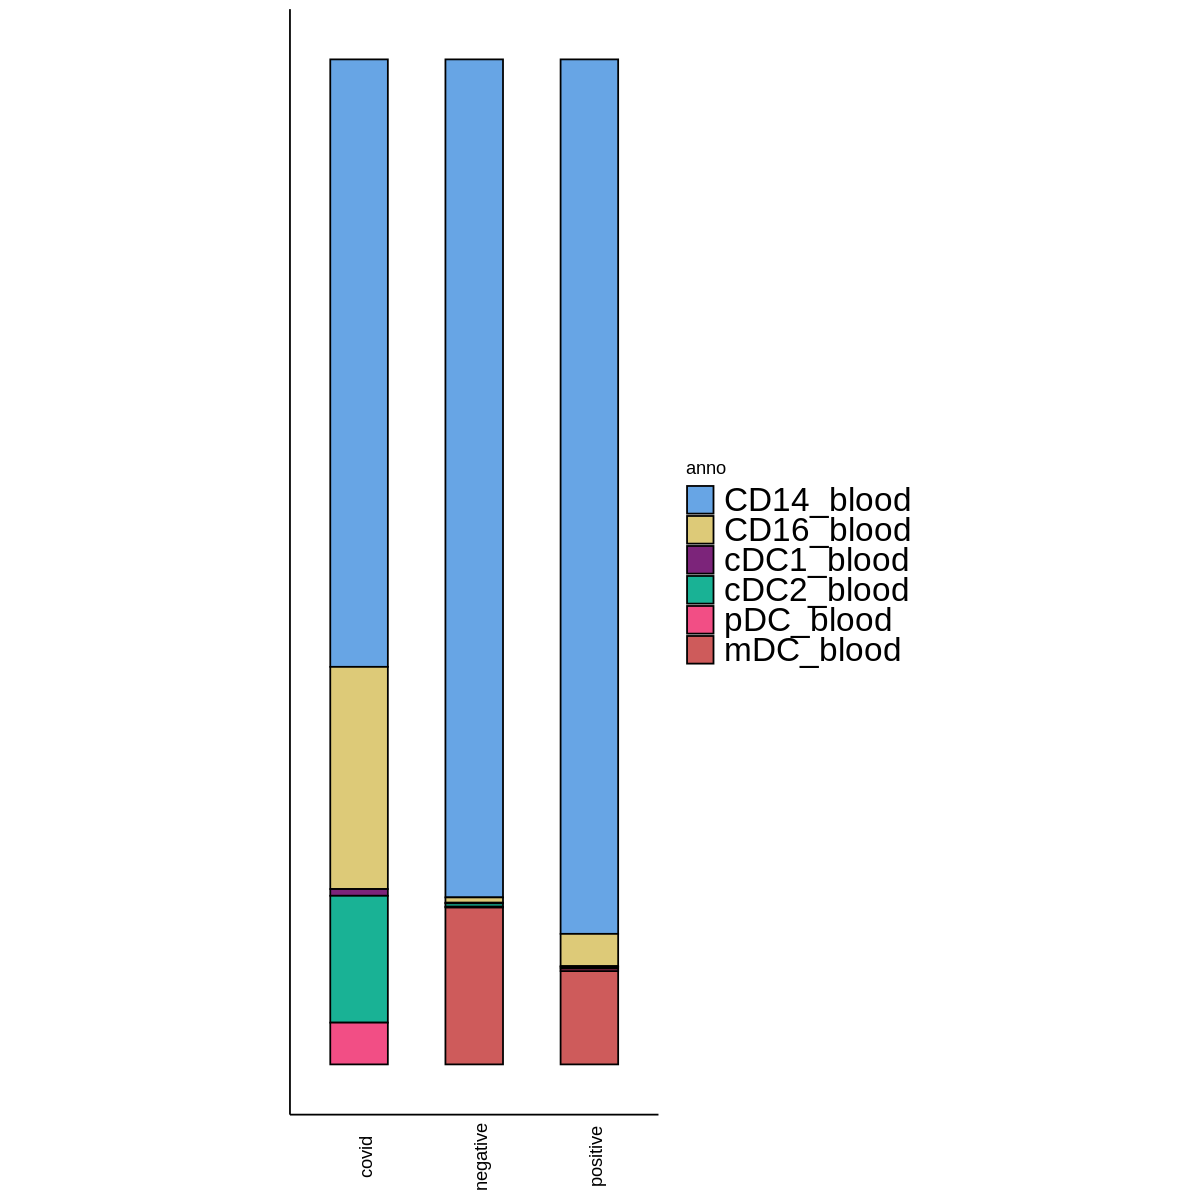

In [192]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(data=total, aes(x=diagnosis, y=average_in_cluster, fill=anno)) +
    geom_bar(stat="identity", position="fill",color="black", width = 0.5) + 
  theme(axis.line =element_blank(), axis.title.x=element_blank(), axis.title.y=element_blank(),  axis.text = element_blank(), axis.ticks = element_blank(),strip.text.x = element_text(size = 12)) +
scale_fill_manual(values = tissue_colours$colors)+
      theme(aspect.ratio = 3/1) +
theme(axis.text.x = element_text(angle = 90)) +
theme(axis.title.x=element_blank(),
  #      axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
      axis.title.y=element_blank(),
      axis.text.y=element_blank()) +
theme(legend.text=element_text(size=20)) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black")) 

setwd('/home/jovyan/data/GCA/figures')

ggsave("myeloid_proportions_barplot.png",  width = NA,  height = NA,  units = c("in", "cm", "mm"),  dpi = 300)

In [147]:
setwd('/home/jovyan/data/GCA/stats')
initial_stats<-read.csv('initial_clustering_stats.csv', row.names = 1)

In [148]:
setwd('/home/jovyan/data/GCA/stats')
covid_stats<-read.csv('covid_stats.csv', row.names = 1)

In [149]:
initial_stats_tissue <- initial_stats %>% filter(tissue =='tissue')
initial_stats_blood <- initial_stats %>% filter(tissue =='blood')


In [150]:
covid_stats$anno<-paste0(covid_stats$anno, '_blood')

In [130]:
initial_stats_blood<-initial_stats_blood %>% filter(anno %in% c('CD14_blood', 'CD16_blood', 
                                                                'cDC1_blood', 'cDC2_blood',
                                                               'pDC_blood'))

In [131]:
covid_stats<-covid_stats %>% filter(anno %in% c('CD14_blood', 'CD16_blood', 
                                                                'cDC1_blood', 'cDC2_blood', 'mDC_blood',
                                                               'pDC_blood'))

In [151]:
total<-rbind(covid_stats, initial_stats_blood)

In [152]:
total<-total %>% count(anno, patient_id, diagnosis, tissue)

total<-total %>% group_by(patient_id) %>% mutate(sum(n))

[1] "list"

In [163]:
summary_results = list()
celltype<-unique(total$anno)

for(i in 1:length(celltype)) {
    temp<-total %>% filter(anno == celltype[i])
    tryCatch(
    expr = {
        nb_temp <- MASS::glm.nb(formula = n ~ diagnosis + offset(log(as.numeric(temp$`sum(n)`))), data = temp, maxit = 1000)
        df_temp<-data.frame(celltype[i], anova(nb_temp, test = "LRT")$`Pr(>Chi)`[2])
        colnames(df_temp)<-c('anno', 'p_value')
        summary_results[[i]]<-df_temp
    },
    error = function(e){ 
        message('Caught an error!')
        print(e)
    }
)

}

big_data = do.call(rbind, summary_results)

Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in sqrt(1/i):
“NaNs produced”
Caught an error!



<simpleError in while ((it <- it + 1) < limit && abs(del) > eps) {    t0 <- abs(t0)    del <- score(n, t0, mu, y, weights)/(i <- info(n, t0, mu,         y, weights))    t0 <- t0 + del    if (trace)         message("theta.ml: iter", it, " theta =", signif(t0))}: missing value where TRUE/FALSE needed>


Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Caught an error!



<simpleError in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels>


Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”
Warning message in anova.negbin(nb_temp, test = "LRT"):
“tests made without re-estimating 'theta'”


In [164]:
big_data

anno,p_value
<chr>,<dbl>
B_cell_imm_blood,0.2518692984766396913975938787189079448580741882324218750000
B_cell_mat_blood,0.2805606219289645819614520405593793839216232299804687500000
CD14_blood,0.0000562489811580144954028699644243971533796866424381732941
CD16_blood,0.0000000000000195426268639849450370309627245646801937527682
CD4_cytotoxic_blood,0.5032614389904551677190625014191027730703353881835937500000
CD4_EM_blood,0.0000375535452369651600299828297924165099175297655165195465
CD4_naive_CM_blood,0.7893963148785597683243508981831837445497512817382812500000
CD8_Eff_blood,0.0001458731818665426902340009895908679027343168854713439941
CD8_naive_blood,0.0002394400912097323374811558283070667130232322961091995239
